<a href="https://colab.research.google.com/github/Redway67/Django/blob/master/%D0%9D%D0%BE%D1%83%D1%82%D0%B1%D1%83%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%E2%84%96_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Solr

## Работа с данными pysolr

In [ ]:
!pip install pysolr

     |████████████████████████████████| 55 kB 2.6 MB/s 
  Created wheel for pysolr: filename=pysolr-3.9.0-py2.py3-none-any.whl size=19670 sha256=d415bf351f4e4881a7c9c22bda89e3eacbd0346d15e073d35ced3fe16c56921a
  Stored in directory: /root/.cache/pip/wheels/92/fb/09/39dc4c504fa354811f4857263bdc2c01b7161e43c51328e74d
Successfully built pysolr


In [ ]:
import pysolr

# Создаем клиент solr, указывая адрес, порт и название core (можно посмотреть в Web интерфейсе)
solr = pysolr.Solr('http://ec2-3-14-13-28.us-east-2.compute.amazonaws.com:32773/solr/gettingstarted/', always_commit=True)


In [ ]:
# Проверим доступность solr
solr.ping()

'{\n  "responseHeader":{\n    "zkConnected":null,\n    "status":0,\n    "QTime":42,\n    "params":{\n      "q":"{!lucene}*:*",\n      "distrib":"false",\n      "df":"_text_",\n      "rows":"10",\n      "echoParams":"all"}},\n  "status":"OK"}\n'

In [ ]:
# Добавим данные

solr.add([
    {
        "id": "doc_1",
        "title": "A test document",
    },
    {
        "id": "doc_2",
        "title": "The Banana: Tasty or Dangerous?",
        "_doc": [
            { "id": "child_doc_1", "title": "peel" },
            { "id": "child_doc_2", "title": "seed" },
        ]
    },
])

# с помощью ключа _doc мы можем объединять несколько документов

'{\n  "responseHeader":{\n    "status":0,\n    "QTime":47}}\n'

In [ ]:
solr.add([
    {
        "id": "doc_3",
        "title": "A test document",
         "text": ["hello","world"],
    }
    ])

'{\n  "responseHeader":{\n    "status":0,\n    "QTime":46}}\n'

In [ ]:
# Попробуем теперь найти документ
results = solr.search('text:hello kitty')

In [ ]:
print("Saw {0} result(s).".format(len(results)))

# Цикл по результатам поиска
for result in results:
    print("The title is '{0}'.".format(result['title']))

Saw 1 result(s).
The title is '['A test document']'.


In [ ]:
# Для поиска нужно указывать поле в котором будем искать:
results = solr.search('title:banana')

print("Saw {0} result(s).".format(len(results)))

# Цикл по результатам поиска
for result in results:
    print("The title is '{0}'.".format(result['title']))

Saw 0 result(s).


In [ ]:
results = solr.search('title:banana', **{
    'hl': 'true',
    'hl.fragsize': 10,
})


In [ ]:
results.raw_response

{'highlighting': {'doc_2': {}},
 'response': {'docs': [{'_version_': 1673288451274833920,
    'id': 'doc_2',
    'title': ['The Banana: Tasty or Dangerous?']}],
  'numFound': 1,
  'start': 0},
 'responseHeader': {'QTime': 3,
  'params': {'hl': 'true',
   'hl.fragsize': '10',
   'q': 'title:banana',
   'wt': 'json'},
  'status': 0}}

In [ ]:
solr.delete(id='doc_2')

'<?xml version="1.0" encoding="UTF-8"?>\n<response>\n\n<lst name="responseHeader">\n  <int name="status">0</int>\n  <int name="QTime">47</int>\n</lst>\n</response>\n'

In [ ]:
#Удалим теперь документы по условию (title содержит banana)
solr.delete(q='title:banana')


'<?xml version="1.0" encoding="UTF-8"?>\n<response>\n\n<lst name="responseHeader">\n  <int name="status">0</int>\n  <int name="QTime">36</int>\n</lst>\n</response>\n'

In [ ]:
# Для поиска нужно указывать поле в котором будем искать:
results = solr.search('title:tasty banana')

print("Saw {0} result(s).".format(len(results)))

# Цикл по результатам поиска
for result in results:
    print("The title is '{0}'.".format(result['title']))

Saw 0 result(s).


In [ ]:
# Результат можно получить с помощью GET запроса
import requests
r = requests.get("http://ec2-3-14-13-28.us-east-2.compute.amazonaws.com:32773/solr/gettingstarted/select?q=title%3Abanana")
r.json()

{'response': {'docs': [{'_version_': 1673290062338457600,
    'id': 'doc_2',
    'title': ['The Banana: Tasty or Dangerous?']}],
  'numFound': 1,
  'start': 0},
 'responseHeader': {'QTime': 1, 'params': {'q': 'title:banana'}, 'status': 0}}

# Apache ignite

## pyignite

In [ ]:
!pip uninstall folium
!pip install folium==0.2.1
!pip install pyignite

Uninstalling folium-0.8.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/folium-0.8.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/folium/*
Proceed (y/n)? y
  Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 71kB 2.0MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79979 sha256=b3deaa0d02ef2d63595efcd43fc23c2f03bf8cb04c5dd267128037a749d0af69
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
     |████████████████████████████████| 71kB 2.4MB/s 
  Found existing installation: attrs 19.3.0
    Uninstalling attrs-19.3.0:
      Successfully uninstalled attrs-19.3.0


In [ ]:
!pip uninstall pyignite

Uninstalling pyignite-0.3.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pyignite-0.3.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pyignite/*
Proceed (y/n)? y
  Successfully uninstalled pyignite-0.3.4


In [ ]:
!pip install pyignite==0.2.0

     |████████████████████████████████| 71kB 2.4MB/s 


In [ ]:
from pyignite import Client

client = Client()
client.connect('ec2-3-14-13-28.us-east-2.compute.amazonaws.com', 32773)

In [ ]:
my_cache = client.get_or_create_cache('MNIST_CACHE')

In [ ]:
for element in dataset:
  print(element)

Streaming output truncated to the last 5000 lines.
         0,   0,   0,   0,   0,   0,   0,   0, 151, 254, 111,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 252, 208,   2,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 254,
       119,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,
       226, 197,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 109, 254, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   5, 192, 241,  44,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'key': <tf.Tensor: shape=(), dtype=int32, numpy=8800>, 'val': {'label': <tf.Tensor: shape=(), dtype=int32, numpy=3>, 'pixels': <tf.Tensor: shape=(784,), dtype=uint8, numpy=
array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  11, 127, 183, 255, 184, 171,  53,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   

KeyboardInterrupt: ignored

In [ ]:
class test.Application$LabeledImageAttributes(tuple):
  pass

SyntaxError: ignored

In [ ]:
my_cache = client.create_cache('my cache')

In [ ]:
my_cache.put('my key', 42)

In [ ]:
result = my_cache.get('my key')
print(result)  # 42

result = my_cache.get('blablabla')
print(result)  # None

42
None


In [ ]:
my_cache.put('my key2', 43)
my_cache.put('my key3', 44)

In [ ]:
result = my_cache.get_all([
    'my key',
    'my key2',
    'my key3',
])
print(result)  

{'my key2': 43, 'my key': 42, 'my key3': 44}


In [ ]:
from pyignite.datatypes import *
# Мы можем задавать тип переменных явно
my_cache.put('my key', 42)
# value ‘42’ takes 9 bytes of memory as a LongObject

my_cache.put('my key', 42, value_hint=ShortObject)
# value ‘42’ takes only 3 bytes as a ShortObject

my_cache.put('a', 1)
# ‘a’ is a key of type String

my_cache.put('a', 2, key_hint=CharObject)
# another key ‘a’ of type CharObject was created


In [ ]:
value = my_cache.get('a')
print(value)


value = my_cache.get('a', key_hint=CharObject)
print(value)


# Удаление ключей за раз
my_cache.remove_keys([
    'a',                
    ('a', CharObject),  
])

1
2


In [ ]:
# Cache’s scan() method queries allows you to get the whole contents of the cache, element by element.

In [ ]:
# Добавим несколько ключей:
my_cache.put_all({'key_{}'.format(v): v for v in range(20)})

In [ ]:
result = my_cache.scan()

for k, v in result:
    print(k, v)

key_3 3
key_2 2
key_1 1
key_0 0
key_7 7
key_6 6
key_5 5
key_4 4
key_9 9
key_8 8
key_19 19
key_17 17
key_18 18
key_15 15
key_16 16
key_13 13
key_14 14
key_11 11
key_12 12
my key 42
my key2 43
my key3 44
key_10 10


In [ ]:
# Выведем в виде словаря
result = my_cache.scan()
print(dict(result))

CacheError: ignored

In [ ]:
# Чтобы уничтожить созданный кэш и закрыть соединение:
my_cache.destroy()
#client.close()

In [ ]:
# работа с SQL

In [ ]:
# Пропишем код для создания трех таблиц Country, City и CountryLanguage:
COUNTRY_CREATE_TABLE_QUERY = '''CREATE TABLE Country (
    Code CHAR(3) PRIMARY KEY,
    Name CHAR(52),
    Continent CHAR(50),
    Region CHAR(26),
    SurfaceArea DECIMAL(10,2),
    IndepYear SMALLINT(6),
    Population INT(11),
    LifeExpectancy DECIMAL(3,1),
    GNP DECIMAL(10,2),
    GNPOld DECIMAL(10,2),
    LocalName CHAR(45),
    GovernmentForm CHAR(45),
    HeadOfState CHAR(60),
    Capital INT(11),
    Code2 CHAR(2)
)'''

CITY_CREATE_TABLE_QUERY = '''CREATE TABLE City (
    ID INT(11),
    Name CHAR(35),
    CountryCode CHAR(3),
    District CHAR(20),
    Population INT(11),
    PRIMARY KEY (ID, CountryCode)
) WITH "affinityKey=CountryCode"'''

LANGUAGE_CREATE_TABLE_QUERY = '''CREATE TABLE CountryLanguage (
    CountryCode CHAR(3),
    Language CHAR(30),
    IsOfficial BOOLEAN,
    Percentage DECIMAL(4,1),
    PRIMARY KEY (CountryCode, Language)
) WITH "affinityKey=CountryCode"'''

In [ ]:
for query in [
    COUNTRY_CREATE_TABLE_QUERY,
    CITY_CREATE_TABLE_QUERY,
    LANGUAGE_CREATE_TABLE_QUERY,
]:
    client.sql(query)

In [ ]:
# Создадим индексы для таблиц City и CountryLanguage
CITY_CREATE_INDEX = '''
CREATE INDEX idx_country_code ON city (CountryCode)'''

LANGUAGE_CREATE_INDEX = '''
CREATE INDEX idx_lang_country_code ON CountryLanguage (CountryCode)'''

In [ ]:
for query in [CITY_CREATE_INDEX, LANGUAGE_CREATE_INDEX]:
    client.sql(query)

In [ ]:
# Добавим данных в таблицы:
city = ["INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (1,'Kabul','AFG','Kabol',1780000);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (2,'Qandahar','AFG','Qandahar',237500);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (3,'Herat','AFG','Herat',186800);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (4,'Mazar-e-Sharif','AFG','Balkh',127800);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (5,'Amsterdam','NLD','Noord-Holland',731200);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (6,'Rotterdam','NLD','Zuid-Holland',593321);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (7,'Haag','NLD','Zuid-Holland',440900);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (8,'Utrecht','NLD','Utrecht',234323);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (9,'Eindhoven','NLD','Noord-Brabant',201843);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (10,'Tilburg','NLD','Noord-Brabant',193238);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (11,'Groningen','NLD','Groningen',172701);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (12,'Breda','NLD','Noord-Brabant',160398);",
"INSERT INTO City(ID, Name, CountryCode, District, Population) VALUES (13,'Apeldoorn','NLD','Gelderland',153491);"
        
]

country = ["INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ABW','Aruba','North America','Caribbean',193.00,NULL,103000,78.4,828.00,793.00,'Aruba','Nonmetropolitan Territory of The Netherlands','Beatrix',129,'AW');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('AFG','Afghanistan','Asia','Southern and Central Asia',652090.00,1919,22720000,45.9,5976.00,NULL,'Afganistan/Afqanestan','Islamic Emirate','Mohammad Omar',1,'AF');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('AGO','Angola','Africa','Central Africa',1246700.00,1975,12878000,38.3,6648.00,7984.00,'Angola','Republic','José Eduardo dos Santos',56,'AO');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('AIA','Anguilla','North America','Caribbean',96.00,NULL,8000,76.1,63.20,NULL,'Anguilla','Dependent Territory of the UK','Elisabeth II',62,'AI');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ALB','Albania','Europe','Southern Europe',28748.00,1912,3401200,71.6,3205.00,2500.00,'Shqipëria','Republic','Rexhep Mejdani',34,'AL');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('AND','Andorra','Europe','Southern Europe',468.00,1278,78000,83.5,1630.00,NULL,'Andorra','Parliamentary Coprincipality','',55,'AD');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ANT','Netherlands Antilles','North America','Caribbean',800.00,NULL,217000,74.7,1941.00,NULL,'Nederlandse Antillen','Nonmetropolitan Territory of The Netherlands','Beatrix',33,'AN');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ARE','United Arab Emirates','Asia','Middle East',83600.00,1971,2441000,74.1,37966.00,36846.00,'Al-Imarat al-´Arabiya al-Muttahida','Emirate Federation','Zayid bin Sultan al-Nahayan',65,'AE');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ARG','Argentina','South America','South America',2780400.00,1816,37032000,75.1,340238.00,323310.00,'Argentina','Federal Republic','Fernando de la Rúa',69,'AR');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ARM','Armenia','Asia','Middle East',29800.00,1991,3520000,66.4,1813.00,1627.00,'Hajastan','Republic','Robert Kotšarjan',126,'AM');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ASM','American Samoa','Oceania','Polynesia',199.00,NULL,68000,75.1,334.00,NULL,'Amerika Samoa','US Territory','George W. Bush',54,'AS');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ATA','Antarctica','Antarctica','Antarctica',13120000.00,NULL,0,NULL,0.00,NULL,'–','Co-administrated','',NULL,'AQ');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ATF','French Southern territories','Antarctica','Antarctica',7780.00,NULL,0,NULL,0.00,NULL,'Terres australes françaises','Nonmetropolitan Territory of France','Jacques Chirac',NULL,'TF');",
"INSERT INTO Country(Code, Name, Continent, Region, SurfaceArea, IndepYear, Population, LifeExpectancy, GNP, GNPOld, LocalName, GovernmentForm, HeadOfState, Capital, Code2) VALUES ('ATG','Antigua and Barbuda','North America','Caribbean',442.00,1981,68000,70.5,612.00,584.00,'Antigua and Barbuda','Constitutional Monarchy','Elisabeth II',63,'AG');"
      
]

clang = ["INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ABW','Dutch','T',5.3);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ABW','English','F',9.5);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ABW','Papiamento','F',76.7);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ABW','Spanish','F',7.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AFG','Balochi','F',0.9);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AFG','Dari','T',32.1);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AFG','Pashto','T',52.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AFG','Turkmenian','F',1.9);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AFG','Uzbek','F',8.8);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Ambo','F',2.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Chokwe','F',4.2);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Kongo','F',13.2);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Luchazi','F',2.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Luimbe-nganguela','F',5.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Luvale','F',3.6);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Mbundu','F',21.6);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Nyaneka-nkhumbi','F',5.4);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AGO','Ovimbundu','F',37.2);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AIA','English','T',0.0);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ALB','Albaniana','T',97.9);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ALB','Greek','F',1.8);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('ALB','Macedonian','F',0.1);",
"INSERT INTO CountryLanguage(CountryCode, Language, IsOfficial, Percentage) VALUES ('AND','Catalan','T',32.3);"
         

]

In [ ]:
# Добавим данные в таблицы
for row in city:
    client.sql(row)

for row in country:
    client.sql(row)

for row in clang:
    client.sql(row)

In [ ]:
MOST_POPULATED_QUERY = '''
SELECT name, population FROM City ORDER BY population DESC LIMIT 10'''

result = client.sql(MOST_POPULATED_QUERY)
print('Most 10 populated cities:')
for row in result:
    print(row)

Most 10 populated cities:
['Kabul', 1780000]
['Amsterdam', 731200]
['Rotterdam', 593321]
['Haag', 440900]
['Qandahar', 237500]
['Utrecht', 234323]
['Eindhoven', 201843]
['Tilburg', 193238]
['Herat', 186800]
['Groningen', 172701]


In [ ]:
CITY_INFO_QUERY = '''SELECT * FROM City WHERE id = 3'''

result = client.sql(
    CITY_INFO_QUERY,
    include_field_names=True,
)
field_names = next(result)
field_data = list(*result)

print('City info:')
for field_name, field_value in zip(field_names*len(field_data), field_data):
    print('{}: {}'.format(field_name, field_value))

SQLError: ignored

In [ ]:
# Удалим созданные таблицы
DROP_TABLE_QUERY = '''DROP TABLE {} IF EXISTS'''

for table_name in [
    'City',
    'CountryLanguage',
    'Country',
]:
    result = client.sql(DROP_TABLE_QUERY.format(table_name))

## Сложные объекты в Ignite

In [ ]:
from pyignite import Client, GenericObjectMeta
from pyignite.datatypes import *

person_cache = client.get_or_create_cache('person')



In [ ]:
from collections import OrderedDict

class Person(metaclass=GenericObjectMeta, schema=OrderedDict([
    ('first_name', String),
    ('last_name', String),
    ('age', IntObject),
])):
    pass

In [ ]:
class Foo(metaclass=GenericObjectMeta):
  pass 

In [ ]:
ff = Foo()


In [ ]:
type(ff)

__main__.Foo

In [ ]:
type(ff.__class__)

pyignite.binary.GenericObjectMeta

In [ ]:
Foo

__main__.Foo

In [ ]:


person_cache.put(
    1, Person(first_name='Ivan', last_name='Ivanov', age=33)
)

In [ ]:
for r in person_cache.scan():
  print (r)

(1, Person(first_name='Ivan', last_name='Ivanov', age=33, version=1))


In [ ]:
person = person_cache.get(1)
print(person.__class__.__name__)

Person


In [ ]:
result = client.sql(
    r'SELECT * FROM Person',
    include_field_names=True
)
print(next(result))

SQLError: ignored

In [ ]:
result = client.get_cache_names()
print(result)

['default', 'person', 'PUBLIC']


In [ ]:
from pyignite.datatypes.prop_codes import *

person_cache2 = client.create_cache({
        PROP_NAME: 'SQL_PUBLIC_PERSON',
        PROP_SQL_SCHEMA: 'PUBLIC',
        PROP_QUERY_ENTITIES: [
            {
                'table_name': 'persons'.upper(),
                'key_field_name': 'SID',
                'key_type_name': 'java.lang.Integer',
                'field_name_aliases': [],
                'query_fields': [
                    {
                        'name': 'SID',
                        'type_name': 'java.lang.Integer',
                        'is_key_field': True,
                        'is_notnull_constraint_field': True,
                    },
                    {
                        'name': 'F_NAME',
                        'type_name': 'java.lang.String',
                    },
                    {
                        'name': 'L_NAME',
                        'type_name': 'java.lang.String',
                    },
                    {
                        'name': 'AGE',
                        'type_name': 'java.lang.Integer',
                    },
                    
                ],
                'query_indexes': [],
                'value_type_name': 'SQL_PUBLIC_PERSON_TYPE',
                'value_field_name': None,
            },
        ],
    })

In [ ]:
person_cache2.put(
    2, Person(first_name='Ivan2', last_name='Ivanov', age=30),key_hint=IntObject
)

In [ ]:
for r in person_cache2.scan():
  print (r)

(2, Person(first_name='Ivan2', last_name='Ivanov', age=30, version=1))
(3, Person2(F_NAME='Ivan3', L_NAME='Ivanov', AGE=31, version=1))


In [ ]:
result = client.sql(
    r'SELECT * FROM persons',
    include_field_names=True
)
#print(next(result))

print(*result)

['SID', 'F_NAME', 'L_NAME', 'AGE'] [3, 'Ivan3', 'Ivanov', 31]


In [ ]:
class Person2(
    metaclass=GenericObjectMeta,
    type_name='SQL_PUBLIC_PERSON_TYPE',
    schema=OrderedDict([
        ('F_NAME', String),
        ('L_NAME', String),
        ('AGE', IntObject),
    ])
):
    pass

In [ ]:
person_cache2.put(
    3, Person2(F_NAME='Ivan3', L_NAME='Ivanov', AGE=31),key_hint=IntObject
)

In [ ]:
result = client.sql(
    r'SELECT * FROM persons',
    include_field_names=True
)
print(next(result))

print(*result)

['SID', 'F_NAME', 'L_NAME', 'AGE']
[3, 'Ivan3', 'Ivanov', 31]


In [ ]:
person_cache2.destroy()

## Машинное обучение в Ignite

In [ ]:
!pip install tensorflow_io

     |████████████████████████████████| 21.8MB 1.4MB/s 


In [ ]:
import tensorflow as tf
from tensorflow_io.ignite import IgniteDataset

In [ ]:
dataset = IgniteDataset(
    'MNIST_CACHE', host='ec2-3-14-13-28.us-east-2.compute.amazonaws.com', port=32773)


In [ ]:
img = dataset.take(3)

In [ ]:
img

<DatasetV1Adapter shapes: {key: (), val: {label: (), pixels: (None,)}}, types: {key: tf.int32, val: {label: tf.int32, pixels: tf.uint8}}>

tf.Tensor(0, shape=(), dtype=int32)


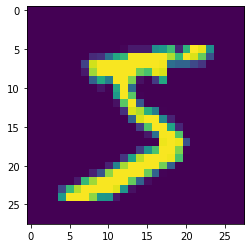

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

for i, img in enumerate(dataset.take(1)):
  print(img['key'])
  plt.imshow(img['val']['pixels'].numpy().reshape([28,28]))

# RAPIDS

## cuDF

In [ ]:
!nvidia-smi

Sun Jul 26 17:11:20 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# Install 
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 165 (delta 60), reused 20 (delta 4), pack-reused 0
Receiving objects: 100% (165/165), 48.48 KiB | 12.12 MiB/s, done.
Resolving deltas: 100% (60/60), done.
PLEASE READ
********************************************************************************************************
Changes:
1. Default stable version is now 0.14.  Nightly is now 0.15.  We have fixed the long conda install.  Hooray!
2. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.15, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh s'
      

In [ ]:
# Critical imports
import nvstrings, nvcategory, cudf
import cuml
import os
import numpy as np
import pandas as pd

In [ ]:
column = cudf.Series([10, 11, 12, 13])
column

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
column2 = pd.Series([10, 11, 12, 13])
column2

0    10
1    11
2    12
3    13
dtype: int64

In [ ]:
type(column2)

pandas.core.series.Series

In [ ]:
df = cudf.DataFrame({'a': np.arange(0, 100), 'b': np.arange(100, 0, -1)})
df.head()

,a,b
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96


In [ ]:
df.columns = ['c', 'd']
df.head()



,c,d
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96


In [ ]:
df.sort_values('c', ascending=False).head()

,c,d
99,99,1
98,98,2
97,97,3
96,96,4
95,95,5


In [ ]:
def add_ten_to_x(x):
    return x + 10

print(df['c'].applymap(add_ten_to_x).head())

0    10
1    11
2    12
3    13
4    14
Name: c, dtype: int64


In [ ]:
# Работа с несколькими cuDF
df1 = cudf.DataFrame({'a': np.repeat([0, 1, 2, 3], 25).astype(np.int32), 
                      'b': np.random.randint(2, size=100).astype(np.int32), 
                      'c': np.arange(0, 100).astype(np.int32), 
                      'd': np.arange(100, 0, -1).astype(np.int32)})
df2 = cudf.DataFrame({'e': np.repeat([0, 1, 2, 3], 25).astype(np.int32), 
                      'f': np.random.randint(2, size=100).astype(np.int32), 
                      'g': np.arange(0, 100).astype(np.int32), 
                      'h': np.arange(100, 0, -1).astype(np.int32)})

df = cudf.concat([df1, df2], axis=1)
df.head()


,a,b,c,d,e,f,g,h
0,0,0,0,100,0,0,0,100
1,0,1,1,99,0,0,1,99
2,0,1,2,98,0,1,2,98
3,0,1,3,97,0,0,3,97
4,0,1,4,96,0,1,4,96


In [ ]:
df1 = cudf.DataFrame({'a': np.repeat([0, 1, 2, 3], 25).astype(np.int32), 
                      'b': np.random.randint(2, size=100).astype(np.int32), 
                      'c': np.arange(0, 100).astype(np.int32), 
                      'd': np.arange(100, 0, -1).astype(np.int32)})
df2 = cudf.DataFrame({'a': np.repeat([0, 1, 2, 3], 25).astype(np.int32), 
                      'b': np.random.randint(2, size=100).astype(np.int32), 
                      'e': np.arange(0, 100).astype(np.int32), 
                      'f': np.arange(100, 0, -1).astype(np.int32)})


df = df1.merge(df2, on=['a', 'b'])
df.head()

,a,b,c,d,e,f
0,0,0,0,100,0,100
1,0,0,16,84,0,100
2,0,0,8,92,0,100
3,0,0,24,76,0,100
4,0,0,1,99,0,100


In [ ]:
df.groupby(['a', 'b']).sum().reset_index()

,a,b,c,d,e,f
0,0,0,1606,14894,1665,14835
1,0,1,2156,11844,1890,12110
2,1,0,7410,13590,7308,13692
3,1,1,4310,6690,4433,6567
4,2,0,8638,5362,8780,5220
5,2,1,10263,6237,10080,6420
6,3,0,13752,1848,13442,2158
7,3,1,13377,2223,13692,1908


In [ ]:
type(df)

NameError: ignored

## cuML

In [ ]:
from sklearn.datasets import load_boston

# загрузим Boston dataset
boston = load_boston()

In [ ]:
# создадим cuDF  
bos = cudf.DataFrame(list(boston.data))
# set column names to feature_names
bos.columns = boston.feature_names

# добавим колонку PRICE 
bos['PRICE'] = boston.target

bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = bos.drop('PRICE',axis=1)
Y = bos['PRICE']

In [ ]:
from cuml.preprocessing.model_selection import train_test_split

# train/test split (70:30)
sX_train, sX_test, sY_train, sY_test = train_test_split(X, Y, train_size = 0.7)

# Выведем размерности
print(sX_train.shape)
print(sX_test.shape)
print(sY_train.shape)
print(sY_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
from cuml import LinearRegression
from sklearn.metrics import mean_squared_error

# call Linear Regression model
slr = LinearRegression(algorithm =  'eig', fit_intercept = True, normalize =  True)

# train the model
model = slr.fit(sX_train, sY_train)

# make predictions for test X values
sY_pred = model.predict(sX_test)

# calculate error
mse = mean_squared_error(sY_test.tolist(), 
                         sY_pred.tolist())
print(mse)

24.080148297578287


In [ ]:
model.coef_

0     -0.147618
1      0.045361
2      0.043315
3      3.208780
4    -14.808887
5      4.135898
6     -0.006088
7     -1.319212
8      0.278109
9     -0.009286
10    -0.897495
11     0.014116
12    -0.540349
dtype: float64

In [ ]:
LinearRegression()

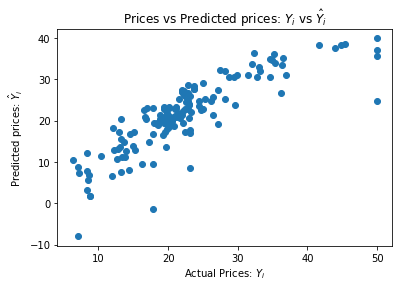

In [ ]:
import cupy
import matplotlib.pyplot as plt

# scatter actual and predicted results
plt.scatter(sY_test.tolist(), sY_pred.tolist())

# label graph
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()

# Apache Kafka

In [ ]:
!pip install kafka-python

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
from kafka import KafkaProducer
producer = KafkaProducer(bootstrap_servers=['ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092'],api_version=(1, 0, 0))
producer.send('sample', b'Hello, World!').get(timeout=10)
producer.send('sample', key=b'message-two', value=b'This is Kafka-Python')

INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connected> [IPv4 ('18.188.97.14', 90

In [ ]:
producer.send('users', b'I am the first user').get(timeout=10)

RecordMetadata(topic='users', partition=0, topic_partition=TopicPartition(topic='users', partition=0), offset=0, timestamp=1596486675112, checksum=None, serialized_key_size=-1, serialized_value_size=19, serialized_header_size=-1)

In [ ]:
producer.send('users', b'I am the second user')

In [ ]:
from kafka import KafkaConsumer
consumer = KafkaConsumer('sample',bootstrap_servers=['ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092'], group_id=None,auto_offset_reset='earliest', enable_auto_commit=False)
for message in consumer:
     print (message)



INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:Probing node bootstrap-0 broker version
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:Broker version identified as 1.0.0
INFO:kafka.conn:Set configuration api_version=(1, 0, 0) to skip auto check_version requests on startup
INFO:kafka.consumer.subscription_state:Updating subscribed topics to: ('sample',)
INFO:kafka.consumer.subscription_state:Updated partition assignment: [TopicPartition(topic='sample', partition=0)]
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting

ConsumerRecord(topic='sample', partition=0, offset=0, timestamp=1596486537657, timestamp_type=0, key=None, value=b'Hello, World!', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=13, serialized_header_size=-1)
ConsumerRecord(topic='sample', partition=0, offset=1, timestamp=1596486538033, timestamp_type=0, key=b'message-two', value=b'This is Kafka-Python', headers=[], checksum=None, serialized_key_size=11, serialized_value_size=20, serialized_header_size=-1)


KeyboardInterrupt: ignored

In [ ]:
from kafka import KafkaConsumer
consumer = KafkaConsumer('users',bootstrap_servers=['ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092'], group_id=None,auto_offset_reset='earliest', enable_auto_commit=False)
for message in consumer:
     print (message)



INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:Probing node bootstrap-0 broker version
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:Broker version identified as 1.0.0
INFO:kafka.conn:Set configuration api_version=(1, 0, 0) to skip auto check_version requests on startup
INFO:kafka.consumer.subscription_state:Updating subscribed topics to: ('users',)
INFO:kafka.consumer.subscription_state:Updated partition assignment: [TopicPartition(topic='users', partition=0)]
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting t

ConsumerRecord(topic='users', partition=0, offset=0, timestamp=1596486675112, timestamp_type=0, key=None, value=b'I am the first user', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=19, serialized_header_size=-1)
ConsumerRecord(topic='users', partition=0, offset=1, timestamp=1596486679655, timestamp_type=0, key=None, value=b'I am the second user', headers=[], checksum=None, serialized_key_size=-1, serialized_value_size=20, serialized_header_size=-1)


KeyboardInterrupt: ignored

In [ ]:
producer.send('sessions', b'data of the first session').get(timeout=10)

RecordMetadata(topic='sessions', partition=0, topic_partition=TopicPartition(topic='sessions', partition=0), offset=0, timestamp=1596478033157, checksum=None, serialized_key_size=-1, serialized_value_size=25, serialized_header_size=-1)

In [ ]:
def fetch_raw(recipe_url):
    html = None
    print('Processing..{}'.format(recipe_url))
    try:
        r = requests.get(recipe_url, headers=headers)
        if r.status_code == 200:
            html = r.text
    except Exception as ex:
        print('Exception while accessing raw html')
        print(str(ex))
    finally:
        return html.strip()


def get_recipes():
    recipies = []
    salad_url = 'https://www.allrecipes.com/recipes/96/salad/'
    url = 'https://www.allrecipes.com/recipes/96/salad/'
    print('Accessing list')

    try:
        r = requests.get(url, headers=headers)
        if r.status_code == 200:
            html = r.text
            soup = BeautifulSoup(html, 'lxml')
            links = soup.select('.fixed-recipe-card__h3 a')
            idx = 0
            for link in links:

                sleep(2)
                recipe = fetch_raw(link['href'])
                recipies.append(recipe)
                idx += 1
                if idx > 2:
                    break
    except Exception as ex:
        print('Exception in get_recipes')
        print(str(ex))
    finally:
        return recipies

In [ ]:
def publish_message(producer_instance, topic_name, key, value):
    try:
        key_bytes = bytes(key, encoding='utf-8')
        value_bytes = bytes(value, encoding='utf-8')
        producer_instance.send(topic_name, key=key_bytes, value=value_bytes)
        producer_instance.flush()
        print('Message published successfully.')
    except Exception as ex:
        print('Exception in publishing message')
        print(str(ex))


def connect_kafka_producer():
    _producer = None
    try:
        _producer = KafkaProducer(bootstrap_servers=['ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092'],api_version=(1, 0, 0))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _producer

In [ ]:
import requests
from bs4 import BeautifulSoup
import html
from time import sleep

headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.182 Safari/537.36',
        'Pragma': 'no-cache'
    }

all_recipes = get_recipes()
if len(all_recipes) > 0:
    kafka_producer = connect_kafka_producer()
    for recipe in all_recipes:
        publish_message(kafka_producer, 'raw_recipes', 'raw', recipe.strip())
    if kafka_producer is not None:
        kafka_producer.close()

Accessing list
Processing..https://www.allrecipes.com/recipe/83903/grandma-sophies-smashed-potato-salad/
Processing..https://www.allrecipes.com/recipe/270850/roasted-beet-salad/
Processing..https://www.allrecipes.com/recipe/215030/taco-slaw/


INFO:kafka.producer.kafka:Kafka producer closed
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaw

Message published successfully.
Message published successfully.


INFO:kafka.producer.kafka:Closing the Kafka producer with 9223372036.0 secs timeout.
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connected> [IPv4 ('18.188.97.14', 9092)]>: Closing connection. 


Message published successfully.


In [ ]:
def retrive_calories(markup):
  soup = BeautifulSoup(markup, 'lxml')
  calories_section = soup.select('.section-body')
  cal = calories_section[2].text.split(';')[0].strip().split(' ')[0]
  return float(cal) 

In [ ]:
soup = BeautifulSoup(all_recipes[1], 'lxml')
calories_section = soup.select('.section-body')

INFO:kafka.producer.kafka:Closing the Kafka producer with 9223372036.0 secs timeout.
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connected> [IPv4 ('18.188.97.14', 9092)]>: Closing connection. 


In [ ]:
calories_section

[<div class="section-body">
 <div class="paragraph">
 <p>Preheat the oven to 400 degrees F (200 degrees C). Wrap beets loosely in aluminum foil and place on a rimmed baking sheet.</p>
 </div>
 </div>, <div class="section-body">
 <div class="paragraph">
 <p>Roast in the preheated oven until easily pierced with a knife or skewer, 50 to 60 minutes. Unwrap and cool until easily handled, about 10 minutes. Peel beets and cut into chunks.</p>
 </div>
 </div>, <div class="section-body">
 <div class="paragraph">
 <p>Mix vinegar and maple syrup together; season with salt and pepper. Pour over beets. Refrigerate until beets absorb the flavors, at least 1 hour. Serve cold.</p>
 </div>
 </div>, <div class="section-body">          66.4 calories;           2 g protein;           15.1 g carbohydrates;           0 mg cholesterol;           136.9 mg sodium.        <a aria-label="Read Full Nutrition" class="recipe-nutrition-section-link link-view" data-tracking-do-not-track="1" href="#">Full Nutrition</a

In [ ]:
parsed_topic_name = 'raw_recipes'

calories_threshold = 200

consumer = KafkaConsumer(parsed_topic_name, bootstrap_servers=['ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092'], group_id=None,auto_offset_reset='earliest', enable_auto_commit=False)
for msg in consumer:
    calories = retrive_calories(msg.value)
    if calories > calories_threshold:
        print('Alert:  calories count is {}'.format( calories))
    sleep(3)

if consumer is not None:
    consumer.close()

INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: connecting to ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 [('18.188.97.14', 9092) IPv4]
INFO:kafka.conn:Probing node bootstrap-0 broker version
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-0 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: Connection complete.
INFO:kafka.conn:Broker version identified as 1.0.0
INFO:kafka.conn:Set configuration api_version=(1, 0, 0) to skip auto check_version requests on startup
INFO:kafka.consumer.subscription_state:Updating subscribed topics to: ('raw_recipes',)
INFO:kafka.consumer.subscription_state:Updated partition assignment: [TopicPartition(topic='raw_recipes', partition=0)]
INFO:kafka.conn:<BrokerConnection node_id=1 host=ec2-18-188-97-14.us-east-2.compute.amazonaws.com:9092 <connecting> [IPv4 ('18.188.97.14', 9092)]>: 

Alert:  calories count is 641.9


ValueError: ignored